### Q.1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Let's there are matrices A(n,k) and B(k,m) and after matrix multiplication (A x B) we will get a new matrix (A x B) = C(n,m).

1. Number of Multiplications: 
For every element in matrix C ( Cij ), i th row of A is multiplied with j th column of B.This is done by using dot product. For every time when a row of matrix A is multiplied with a column of matrix B number of multiplication are k.
This occures repeatedly for m times, means i th row of matrix A multiplying with m rows of mtrix B. Hence, (m x k) multiplications.
And this (m x k) number of multiplication ocurres n times with every row of the matrix A, doing (n x m x k) number of multiplications.

Hence, total number of Multiplications in the cross product of matrices A(n,k) and B(k,m) are (n x k x m).

2. Number of Additions: 
When we do k multiplications for every element of matrix C, we add k elements. Means (k-1) number of additions. So, when i th row of matrix A is multipled with all the columns of matix B total number of additions become (k-1) x m.
Also, when n rows of matrix A are getting multiplied, number of additions become (k-1) x m x n.

Hence total number of Additions in the cross product of matrices A(n,k) and B(k,m) are (k-1) x m x n.

Total multiplications: n x m x k
Total additions: n x m x (k-1)

### Q.2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [7]:
import time
import numpy as np

n = 300
k = 400
m = 500

A = np.random.random((n, k)).tolist()

B = np.random.random((k, m)).tolist()

def matrix_multiplication(A, B):
    C = [[0] * len(B[0]) for _ in range(len(A))]

    for i in range(len(A)):
        for j in range(len(B[0])):
            C[i][j] = sum(A[i][x] * B[x][j] for x in range(len(B)))
    
    return C


start_time = time.time()
C = matrix_multiplication(A, B)
end_time = time.time()
list_time = end_time - start_time

print(f"\nTime taken for list of lists multiplication: {list_time} seconds")


A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
C_np = np.dot(A_np, B_np)
end_time = time.time()
numpy_time = end_time - start_time

print(f"Time taken for NumPy multiplication: {numpy_time} seconds")


Time taken for list of lists multiplication: 7.6287620067596436 seconds
Time taken for NumPy multiplication: 0.0 seconds


Reason: NumPy is much faster than plain Python for multiplying matrices. This is because NumPy uses special, fast code to do the work, while plain Python uses slow loops. For big matrices, NumPy can do the job much quicker because it’s built to handle these tasks more efficiently.

### Q.3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

To find the median by sequentially finding the highest, second highest, third highest, etc. the time complexity is:
1. Find the Highest: O(n)
2. Find the Second Highest: O(n)
3. Find the Third Highest: O(n)
4. Continue Until Median: Up to n/2 passes

Total time complexity: O(n) x n/2 = O(n²)

Thus, this method is O(n²), which is less efficient than sorting O(nlogn).

In [51]:
import numpy as np
import time
import random

def find_median_sequentially(arr):
    arr = arr.copy()
    n = len(arr)
    
    def find_kth_highest(k):
        num = arr.copy()
        for _ in range(k):
            highest = max(num)
            num.remove(highest)
        return max(num)
    
    if n % 2 == 1:
        k = (n // 2) + 1
        median = find_kth_highest(k)
    else:
        k1 = n // 2
        k2 = k1 + 1
        median1 = find_kth_highest(k1)
        median2 = find_kth_highest(k2)
        median = (median1 + median2) / 2
    
    return median

def generate_random_list(size):
    return [random.randint(1, 10000) for _ in range(size)]

def median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1, mid2 = sorted_arr[n // 2 - 1], sorted_arr[n // 2]
        return (mid1 + mid2) / 2

from random import randint

def partition(arr, left, right, pivot_index):
    pivot_value = arr[pivot_index]
    arr[pivot_index], arr[right] = arr[right], arr[pivot_index]
    store_index = left
    for i in range(left, right):
        if arr[i] < pivot_value:
            arr[store_index], arr[i] = arr[i], arr[store_index]
            store_index += 1
    arr[right], arr[store_index] = arr[store_index], arr[right]
    return store_index

def quickselect(arr, left, right, k):
    if left == right:
        return arr[left]
    pivot_index = randint(left, right)
    pivot_index = partition(arr, left, right, pivot_index)
    if k == pivot_index:
        return arr[k]
    elif k < pivot_index:
        return quickselect(arr, left, pivot_index - 1, k)
    else:
        return quickselect(arr, pivot_index + 1, right, k)

def median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, 0, n - 1, n // 2)
    else:
        left = quickselect(arr, 0, n - 1, n // 2 - 1)
        right = quickselect(arr, 0, n - 1, n // 2)
        return (left + right) / 2

def median_numpy(arr):
    return np.median(arr)

arr = generate_random_list(2000)

start = time.time()
median_np = find_median_sequentially(arr)
end = time.time()
print(f"Sequential method (size={size}): {end - start} seconds")

start = time.time()
median_sort = median_sorting(arr.copy())
end = time.time()
print(f"Sorting method (size={size}): {end - start} seconds")

start = time.time()
median_quick = median_quickselect(arr.copy())
end = time.time()
print(f"Quickselect method (size={size}): {end - start} seconds")

start = time.time()
median_sq = median_numpy(arr)
end = time.time()
print(f"NumPy method (size={size}): {end - start} seconds")

Sequential method (size=20000): 0.10439682006835938 seconds
Sorting method (size=20000): 0.0 seconds
Quickselect method (size=20000): 0.0 seconds
NumPy method (size=20000): 0.0 seconds


### Q.4 What is the gradient of the following function with respect to x and y?

x² y + y³ sin(x)

The Gradient function is the vector of Partial derivatives.
▽ f(x,y) = ( ∂f/∂x, ∂f/∂y )

partial derivative of x² y + y³ sin(x) with respect to x is 2xy + y³ cos(x).
partial derivative of x² y + y³ sin(x) with respect to y is x² + 3y² sin(x).

Hence, the gradient function is
▽ f(x,y) = (2xy + y³ cos(x) , x² + 3y² sin(x))

### Q.5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [55]:
pip install jax jaxlib

                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB 653.6 kB/s eta 0:00:04
     ---                                      0.2/2.0 MB 1.8 MB/s eta 0:00:02
     ---------                                0.5/2.0 MB 3.5 MB/s eta 0:00:01
     ---------------------                    1.1/2.0 MB 5.9 MB/s eta 0:00:01
     ---------------------------------------  2.0/2.0 MB 9.3 MB/s eta 0:00:01
     ---------------------------------------- 2.0/2.0 MB 8.7 MB/s eta 0:00:00
                                              0.0/56.3 MB ? eta -:--:--
                                              0.9/56.3 MB 19.2 MB/s eta 0:00:03
                                              0.9/56.3 MB 19.6 MB/s eta 0:00:03
                                              0.9/56.3 MB 19.6 MB/s eta 0:00:03
     --                                       3.1/56.3 MB 18.0 MB/s eta 0:00:03
     --                                       4.1/56.3 MB 17.5 MB/s


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import jax
import jax.numpy as jnp
from jax import grad
import numpy as np

def my_function(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_function = jax.jit(jax.value_and_grad(my_function, argnums=(0, 1)))

def evaluate_gradients(x_val, y_val):
    x = jnp.array(x_val)
    y = jnp.array(y_val)
    value, (grad_x, grad_y) = grad_function(x, y)
    return value, grad_x, grad_y

x_val = np.random.rand()
y_val = np.random.rand()
value, grad_x, grad_y = evaluate_gradients(x_val, y_val)

def analytical_gradients(x, y):
    grad_x_analytical = 2 * x * y + y**3 * jnp.cos(x)
    grad_y_analytical = x**2 + 3 * y**2 * jnp.sin(x)
    return grad_x_analytical, grad_y_analytical

grad_x_analytical, grad_y_analytical = analytical_gradients(x_val, y_val)

print(f"Random values: x = {x_val:.4f}, y = {y_val:.4f}")
print(f"JAX gradient: ∂f/∂x = {grad_x:.4f}, ∂f/∂y = {grad_y:.4f}")
print(f"Analytical gradient: ∂f/∂x = {grad_x_analytical:.4f}, ∂f/∂y = {grad_y_analytical:.4f}")

Random values: x = 0.5038, y = 0.4782
JAX gradient: ∂f/∂x = 0.5776, ∂f/∂y = 0.5850
Analytical gradient: ∂f/∂x = 0.5776, ∂f/∂y = 0.5850


### Q.6 Use sympy to confirm that you obtain the same gradient analytically.

In [58]:
pip install sympy

                                              0.0/6.2 MB ? eta -:--:--
                                              0.0/6.2 MB ? eta -:--:--
                                              0.0/6.2 MB 325.1 kB/s eta 0:00:19
                                              0.0/6.2 MB 325.1 kB/s eta 0:00:19
                                              0.0/6.2 MB 325.1 kB/s eta 0:00:19
                                              0.0/6.2 MB 325.1 kB/s eta 0:00:19
                                              0.0/6.2 MB 325.1 kB/s eta 0:00:19
                                              0.1/6.2 MB 130.9 kB/s eta 0:00:47
                                              0.1/6.2 MB 208.4 kB/s eta 0:00:30
                                              0.1/6.2 MB 235.7 kB/s eta 0:00:26
                                              0.1/6.2 MB 261.9 kB/s eta 0:00:24
                                              0.1/6.2 MB 261.9 kB/s eta 0:00:24
                                              0.1/6.2 MB 2


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Function: f(x, y) =", f)
print("Partial derivative with respect to x: ∂f/∂x =", df_dx)
print("Partial derivative with respect to y: ∂f/∂y =", df_dy)

Function: f(x, y) = x**2*y + y**3*sin(x)
Partial derivative with respect to x: ∂f/∂x = 2*x*y + y**3*cos(x)
Partial derivative with respect to y: ∂f/∂y = x**2 + 3*y**2*sin(x)


### Q.7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

In [25]:
student_records = {
    2022: {
        "Branch 1": {
            "Roll Number 1": {
                "Name": "N1",
                "Marks": {
                    "Subject 1": 100,
                    "Subject 2": 70,
                    "Subject 3": 85
                }
            },
            "Roll Number 2": {
                "Name": "N2",
                "Marks": {
                    "Subject 1": 90,
                    "Subject 2": 80,
                    "Subject 3": 88
                }
            }
        },
        "Branch 2": {
            "Roll Number 1": {
                "Name": "N3",
                "Marks": {
                    "Subject 1": 95,
                    "Subject 2": 85,
                    "Subject 3": 90
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            "Roll Number 1": {
                "Name": "N4",
                "Marks": {
                    "Subject 1": 85,
                    "Subject 2": 75,
                    "Subject 3": 80
                }
            }
        },
        "Branch 2": {
            "Roll Number 1": {
                "Name": "N5",
                "Marks": {
                    "Subject 1": 80,
                    "Subject 2": 90,
                    "Subject 3": 85
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            "Roll Number 1": {
                "Name": "N6",
                "Marks": {
                    "Subject 1": 70,
                    "Subject 2": 60,
                    "Subject 3": 75
                }
            }
        },
        "Branch 2": {
            "Roll Number 1": {
                "Name": "N7",
                "Marks": {
                    "Subject 1": 78,
                    "Subject 2": 82,
                    "Subject 3": 88
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            "Roll Number 1": {
                "Name": "N8",
                "Marks": {
                    "Subject 1": 92,
                    "Subject 2": 89,
                    "Subject 3": 94
                }
            }
        },
        "Branch 2": {
            "Roll Number 1": {
                "Name": "N9",
                "Marks": {
                    "Subject 1": 88,
                    "Subject 2": 77,
                    "Subject 3": 82
                }
            }
        }
    }
}

import pprint
pprint.pprint(student_records)

{2022: {'Branch 1': {'Roll Number 1': {'Marks': {'Subject 1': 100,
                                                 'Subject 2': 70,
                                                 'Subject 3': 85},
                                       'Name': 'N1'},
                     'Roll Number 2': {'Marks': {'Subject 1': 90,
                                                 'Subject 2': 80,
                                                 'Subject 3': 88},
                                       'Name': 'N2'}},
        'Branch 2': {'Roll Number 1': {'Marks': {'Subject 1': 95,
                                                 'Subject 2': 85,
                                                 'Subject 3': 90},
                                       'Name': 'N3'}}},
 2023: {'Branch 1': {'Roll Number 1': {'Marks': {'Subject 1': 85,
                                                 'Subject 2': 75,
                                                 'Subject 3': 80},
                                      

### Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [29]:
class SubjectMarks:
    def __init__(self, **subjects):
        self.subjects = subjects

    def __repr__(self):
        return f"Marks: {self.subjects}"

class Student:
    def __init__(self, roll_number, full_name, grades):
        self.roll_number = roll_number
        self.full_name = full_name
        self.grades = grades

    def __repr__(self):
        return f"{self.full_name} (Roll Number: {self.roll_number}) - {self.grades}"

class Department:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students_list = []

    def add_student(self, student):
        self.students_list.append(student)

    def __repr__(self):
        return f"Department: {self.branch_name}, Students: {self.students_list}"

class AcademicYear:
    def __init__(self, year):
        self.year = year
        self.departments = []

    def add_department(self, department):
        self.departments.append(department)

    def __repr__(self):
        return f"Academic Year: {self.year}, Departments: {self.departments}"

records_database = []

year_2022 = AcademicYear(2022)

dept_1_2022 = Department("Branch 1")
dept_1_2022.add_student(Student("Roll Number 1", "Name 1", SubjectMarks(SubjectA=100, SubjectB=70, SubjectC=85)))
dept_1_2022.add_student(Student("Roll Number 2", "Name 2", SubjectMarks(SubjectA=90, SubjectB=80, SubjectC=88)))

dept_2_2022 = Department("Branch 2")
dept_2_2022.add_student(Student("Roll Number 1", "Name 3", SubjectMarks(SubjectA=95, SubjectB=85, SubjectC=90)))

year_2022.add_department(dept_1_2022)
year_2022.add_department(dept_2_2022)

year_2023 = AcademicYear(2023)

dept_1_2023 = Department("Branch 1")
dept_1_2023.add_student(Student("Roll Number 1", "Name 4", SubjectMarks(SubjectA=85, SubjectB=75, SubjectC=80)))

dept_2_2023 = Department("Branch 2")
dept_2_2023.add_student(Student("Roll Number 1", "Name 5", SubjectMarks(SubjectA=80, SubjectB=90, SubjectC=85)))

year_2023.add_department(dept_1_2023)
year_2023.add_department(dept_2_2023)

year_2024 = AcademicYear(2024)

dept_1_2024 = Department("Branch 1")
dept_1_2024.add_student(Student("Roll Number 1", "Name 6", SubjectMarks(SubjectA=70, SubjectB=60, SubjectC=75)))

dept_2_2024 = Department("Branch 2")
dept_2_2024.add_student(Student("Roll Number 1", "Name 7", SubjectMarks(SubjectA=78, SubjectB=82, SubjectC=88)))

year_2024.add_department(dept_1_2024)
year_2024.add_department(dept_2_2024)

year_2025 = AcademicYear(2025)

dept_1_2025 = Department("Branch 1")
dept_1_2025.add_student(Student("Roll Number 1", "Name 8", SubjectMarks(SubjectA=92, SubjectB=89, SubjectC=94)))

dept_2_2025 = Department("Branch 2")
dept_2_2025.add_student(Student("Roll Number 1", "Name 9", SubjectMarks(SubjectA=88, SubjectB=77, SubjectC=82)))

year_2025.add_department(dept_1_2025)
year_2025.add_department(dept_2_2025)

records_database.extend([year_2022, year_2023, year_2024, year_2025])

for academic_year in records_database:
    print(academic_year)
    print()

Academic Year: 2022, Departments: [Department: Branch 1, Students: [Name 1 (Roll Number: Roll Number 1) - Marks: {'SubjectA': 100, 'SubjectB': 70, 'SubjectC': 85}, Name 2 (Roll Number: Roll Number 2) - Marks: {'SubjectA': 90, 'SubjectB': 80, 'SubjectC': 88}], Department: Branch 2, Students: [Name 3 (Roll Number: Roll Number 1) - Marks: {'SubjectA': 95, 'SubjectB': 85, 'SubjectC': 90}]]

Academic Year: 2023, Departments: [Department: Branch 1, Students: [Name 4 (Roll Number: Roll Number 1) - Marks: {'SubjectA': 85, 'SubjectB': 75, 'SubjectC': 80}], Department: Branch 2, Students: [Name 5 (Roll Number: Roll Number 1) - Marks: {'SubjectA': 80, 'SubjectB': 90, 'SubjectC': 85}]]

Academic Year: 2024, Departments: [Department: Branch 1, Students: [Name 6 (Roll Number: Roll Number 1) - Marks: {'SubjectA': 70, 'SubjectB': 60, 'SubjectC': 75}], Department: Branch 2, Students: [Name 7 (Roll Number: Roll Number 1) - Marks: {'SubjectA': 78, 'SubjectB': 82, 'SubjectC': 88}]]

Academic Year: 2025, D

### Q.9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. y = x
2. y = x²
3. y = x³/100
4. y = sin(x)
5. y = sin(x)/x
6. y = log(x)
7. y = e^x

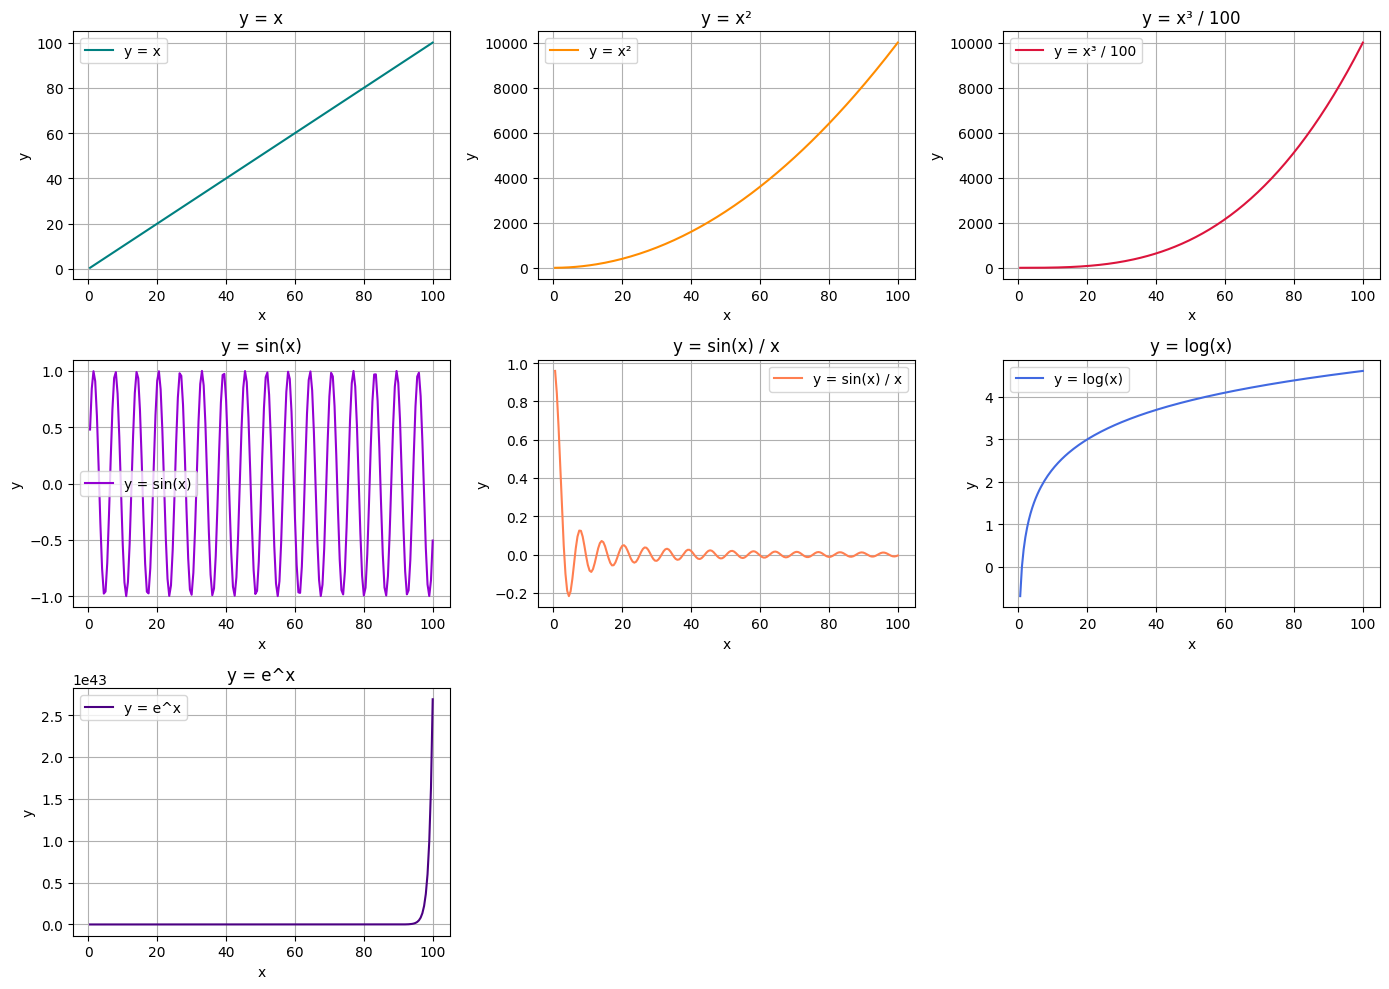

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0.5, 100.5, 0.5)

line1 = x_values
line2 = x_values**2
line3 = x_values**3 / 100
line4 = np.sin(x_values)
line5 = np.sin(x_values) / x_values
line6 = np.log(x_values)
line7 = np.exp(x_values)

plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.plot(x_values, line1, label='y = x', color='teal')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(x_values, line2, label='y = x²', color='darkorange')
plt.title('y = x²')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(x_values, line3, label='y = x³ / 100', color='crimson')
plt.title('y = x³ / 100')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(x_values, line4, label='y = sin(x)', color='darkviolet')
plt.title('y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 5)
plt.plot(x_values, line5, label='y = sin(x) / x', color='coral')
plt.title('y = sin(x) / x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(x_values, line6, label='y = log(x)', color='royalblue')
plt.title('y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(x_values, line7, label='y = e^x', color='indigo')
plt.title('y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Q.10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [40]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

print("Matrix:")
print(matrix)

print("\nDataFrame:")
print(df)

std_devs = df.std()
highest_std_col = std_devs.idxmax()
print(f"\nColumn with the highest standard deviation: {highest_std_col}")

row_means = df.mean(axis=1)
lowest_mean_row = row_means.idxmin()
print(f"Row with the lowest mean: {lowest_mean_row}")

Matrix:
[[1.83443099 1.68733486 1.24628834 1.15008782 1.35121287]
 [1.59207258 1.00275197 1.93395792 1.72804319 1.06759879]
 [1.43360076 1.51661792 1.1739501  1.4651646  1.26595543]
 [1.11914837 1.29722617 1.49787368 1.06866229 1.70012162]
 [1.6886847  1.41035729 1.27754997 1.79196039 1.00472366]
 [1.37200529 1.98679162 1.58350927 1.98391932 1.59624651]
 [1.63907066 1.14821828 1.87662611 1.37892939 1.32889948]
 [1.34805612 1.4603099  1.0167258  1.09199525 1.74307426]
 [1.50470224 1.29892285 1.54088556 1.14789987 1.31044431]
 [1.80282506 1.63087665 1.02343284 1.82843124 1.30418242]
 [1.02297735 1.9241405  1.61646306 1.5117971  1.66044907]
 [1.92793876 1.00619897 1.20447688 1.13365287 1.24554151]
 [1.56781915 1.92890394 1.48691351 1.04522103 1.99828609]
 [1.6759705  1.8346389  1.95913546 1.75650047 1.85528112]
 [1.69326904 1.89918209 1.98632876 1.16026048 1.02617341]
 [1.1946426  1.4621248  1.58900324 1.68239902 1.55627911]
 [1.6256206  1.23722871 1.04588292 1.10970712 1.11379169]
 [1.58

### Q.11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [45]:
import numpy as np
import pandas as pd

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_LT8 = (df['g'] == 'LT8').sum()

std_f_LT8 = df[df['g'] == 'LT8']['f'].std()

std_f_GT8 = df[df['g'] == 'GT8']['f'].std()

print("DataFrame:")
print(df)
print("\nNumber of rows with 'g' = 'LT8':")
print(num_LT8)
print("\nStandard deviation of 'f' where 'g' = 'LT8':")
print(std_f_LT8)
print("\nStandard deviation of 'f' where 'g' = 'GT8':")
print(std_f_GT8)

DataFrame:
           a         b         c         d         e         f    g
0   1.884547  1.491567  1.469212  1.547911  1.599556  7.992793  LT8
1   1.898517  1.183743  1.831600  1.695686  1.905343  8.514890  GT8
2   1.811383  1.791441  1.108216  1.097975  1.406363  7.215378  LT8
3   1.832344  1.029327  1.268488  1.951847  1.197447  7.279452  LT8
4   1.343240  1.705354  1.036491  1.802153  1.424004  7.311241  LT8
5   1.079055  1.497695  1.641348  1.703674  1.452938  7.374709  LT8
6   1.380793  1.212558  1.366087  1.712353  1.685148  7.356940  LT8
7   1.421199  1.827402  1.326476  1.274320  1.023596  6.872993  LT8
8   1.315092  1.300139  1.670680  1.283122  1.891632  7.460664  LT8
9   1.396127  1.985582  1.868341  1.837074  1.377176  8.464300  GT8
10  1.340746  1.987985  1.769051  1.582902  1.010612  7.691297  LT8
11  1.445033  1.250572  1.821628  1.327960  1.817155  7.662349  LT8
12  1.398048  1.270688  1.259559  1.985507  1.831690  7.745492  LT8
13  1.789737  1.747153  1.877688  1.3

### Q.12 Write a small piece of code to explain broadcasting in numpy.

###### Broadcasting with a Scalar

In [52]:
import numpy as np

array_2d = np.array([
    [15, 25, 35, 45, 55],
    [65, 75, 85, 95, 105],
    [115, 125, 135, 145, 155]
])

scalar = 8

result_with_scalar = array_2d + scalar

print("2D Array:")
print(array_2d)
print("\nScalar Value:")
print(scalar)
print("\nResult of array_2d + scalar:")
print(result_with_scalar)

2D Array:
[[ 15  25  35  45  55]
 [ 65  75  85  95 105]
 [115 125 135 145 155]]

Scalar Value:
8

Result of array_2d + scalar:
[[ 23  33  43  53  63]
 [ 73  83  93 103 113]
 [123 133 143 153 163]]


###### Broadcasting with a 1D Vector
The 1D vector will be broadcasted across each row of the 2D array.

In [53]:
vector = np.array([5, 10, 15, 20, 25])

result_with_vector = array_2d + vector

print("\n1D Vector:")
print(vector)
print("\nResult of array_2d + vector:")
print(result_with_vector)


1D Vector:
[ 5 10 15 20 25]

Result of array_2d + vector:
[[ 20  35  50  65  80]
 [ 70  85 100 115 130]
 [120 135 150 165 180]]


### Q.13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [47]:
import numpy as np

def compute_argmin(arr):
    if not isinstance(arr, np.ndarray):
        raise TypeError("Input must be a NumPy array")
    if arr.size == 0:
        raise ValueError("Input array must not be empty")

    min_value = np.min(arr)
    min_index = np.where(arr == min_value)[0][0]
    
    return min_index

# New array with numbers greater than 100
array = np.array([150, 200, 120, 180, 110])
custom_argmin = compute_argmin(array)

numpy_argmin = np.argmin(array)

print("Custom argmin index:", custom_argmin)
print("NumPy argmin index:", numpy_argmin)

assert custom_argmin == numpy_argmin, "The custom argmin function does not match np.argmin"

Custom argmin index: 4
NumPy argmin index: 4
